# Marine Heatwaves 3
# Marine Heatwaves and Coral Bleaching

This introductory notebook to marine heatwaves (MHWs) examines global satellite sea surface temperature (SST) in the  National Oceanic and Atmospheric Administration Optimum  Interpolation  Sea  Surface Temperature (OISST) dataset. The MHW definition of Hobday et. at. (2016) is implented by the MHW tracker website http://www.marineheatwaves.org/tracker.html. 


### I'm not too sure how to proceed with this one - I can get sat data for coral bleaching hotspot and degree heating week (derived from SST?) 


To run this notebook, select a point on the MHW tracker map and then click **Time series** on the right hand side of the page.


Next, download the **Climatology & Threshold (csv)** and open the next tab and download the **MHW data (csv)** and save both files in the folder where this notebook is saved.


For more information on the OISST dataset:
https://www.ncdc.noaa.gov/oisst



(Ignore these)


http://simondonner.com/bleachingdatabase/

ReefBase (www.reefbase.org) is a global information system for coral reef conservationand management developed by WorldFish Centre, Penang, Malaysia. It provides managerswith monitoring data and advice on coral reefs, and stores all records from the GlobalCoral Reef Monitoring Network (GCRMN) and Reef Check. Worldwide coral bleachingreports, maps, photographs, and  literature  are  available  on  the  website, and  bleachingreports can be submitted online for inclusion into the databases.

http://www.reefbase.org/gis_maps/datasets.aspx



 The  Great  Barrier  Reef  Marine  Park  Authority  (Australia)  (www.gbrmpa.gov.au)  hasdeveloped a volunteer program called 'BleachWatch' to encourage dive operators andother  regular  users  of  the  reef  to  monitor  for  bleaching  in  areas  they  frequently  visit.Similar programs have also been developed for use in Bali Barat National Park (Indonesia)and the Florida Keys National Marine Sanctuary (USA). BleachWatch kit materials, suchas an armband showing degrees of bleaching and reporting forms printed on waterproofpaper are designed specifically for these types of reef users so that they can easily noteand  report  any  bleaching  with  minimal  inconvenience  to  their  normal  operations. TheGBRMPA website is also a source of information and images relevant to coral bleaching.
 
 The  Coral  Reef  Alliance  (www.coralreefalliance.org)  hosts  the  International  Coral  ReefInformation Network library online. Bleaching papers, briefing sheets, reports and otherinformation can be accessed online
 
The  National  Oceanic  and  Atmospheric  Administration  (NOAA)  Coral  ReefConservation  Program  (www.coralreef.noaa.gov)  provides  a  number  of  tools  andresources  related  to  coral  bleaching  events  such  as  Coral  Reef  Watch  (CRW).Coral  Reef  Watch  provides  three  tools  that  analyse  satellite  imagery  to  assess  thelikelihood  of  mass  coral  bleaching  events. These  products  are  freely  available  over  theInternet, and  include: HotSpot  maps, degree  heating  week  maps, and  Tropical  OceanCoral  Bleaching  Indices. Other  tools  and  information  are  available  through  NOAA'sCoral Reef Information System (www.coris.noaa.gov).

In [1]:
# Load required modules (ignore the yaml warning).
import numpy as np
import xarray as xr
import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

C:\Users\Annette\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\Annette\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [37]:
# Add the latitude and longitude of the data that you downloaded from the MHW tracker (must be exactly the same!).
# lat = -18.875
# lon = 147.625
lat = -28.875
lon = 112.875
# Select a year year range to plot SST. It can be from 1981 to 2019, but only select a 
# few years or it will slow down the notebook and possibly throw an error. 
# You'll still have the full range of MHW statistics.
year_start = 2015
year_end = 2016

Load in the csv files you downloaded from the MHW tracker site (depending on the lat/lon values).

In [39]:
clim = pd.read_csv('clim_lon_{}_lat_{}.csv'.format(lon, lat))
mhws = pd.read_csv('event_lon_{}_lat_{}.csv'.format(lon, lat), parse_dates=[4, 5, 6])

Open the SST satellite data as an xarray dataset (this may be slow depending on the year range):

In [4]:
# URL of NOAA OISST data (for our plot later).
url_sst = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.mean'

# Create a list of file names in the selected year range.
files = [f'{url_sst}.{year}.v2.nc' for year in range(year_start, year_end + 1)]
ds = xr.open_mfdataset(files, parallel=True)
sst = ds.sst.sel(lat=lat, lon=lon, method='nearest').values
ds

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 730)
Coordinates:
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.375 359.625 359.875
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2011-12-31
Data variables:
    sst      (time, lat, lon) float32 dask.array<shape=(730, 720, 1440), chunksize=(365, 720, 1440)>
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA High-resolution Blended Analysis: D...
    institution:                     NOAA/NCDC
    source:                          NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/p...
    comment:                         Reynolds, et al., 2007: Daily High-Resol...
    history:                         Thu Aug 24 13:49:55 2017: ncatted -O -a ...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    dataset_title:                   NOAA Daily Optimum Interpolation Se

In [44]:
# http://oos.soest.hawaii.edu/thredds/catalog.html
# http://oos.soest.hawaii.edu/thredds/dodsC/hioos/satellite/dhw_5km
# url_crw = 'https://oceanwatch.pfeg.noaa.gov/thredds/dodsC/satellite/RW/hots/1day'
url_crw = 'https://oceanwatch.pfeg.noaa.gov/thredds/dodsC/satellite/RW/dhws/1day'
# /thredds/dodsC/hioos/satellite/dhw_5km
crw = xr.open_dataset(url_crw)

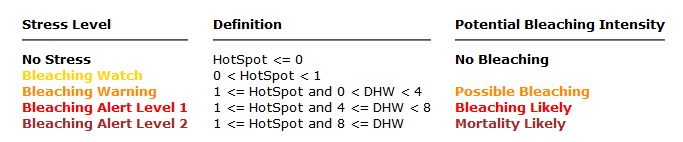

In [45]:
crw

<xarray.Dataset>
Dimensions:   (altitude: 1, lat: 332, lon: 720, time: 1065)
Coordinates:
  * altitude  (altitude) float64 0.0
  * lat       (lat) float64 -80.25 -79.75 -79.25 -78.75 ... 84.25 84.75 85.25
  * lon       (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time      (time) datetime64[ns] 2000-12-02T12:00:00 ... 2011-03-03T12:00:00
Data variables:
    RWdhws    (time, altitude, lat, lon) float32 ...
Attributes:
    acknowledgement:               NOAA NESDIS COASTWATCH, NOAA SWFSC ERD
    cdm_data_type:                 Grid
    cols:                          720
    composite:                     true
    contributor_name:              NOAA NESDIS Coral Reef Watch
    contributor_role:              Source of level 2 data.
    Conventions:                   COARDS, CF-1.0, Unidata Dataset Discovery ...
    creator_email:                 dave.foley@noaa.gov
    creator_name:                  NOAA CoastWatch, West Coast Node
    creator_url:                 

In [40]:
ev = np.argmax(mhws.intensity_max)
print('Maximum intensity: {:.2f}°C'.format(mhws.intensity_max[ev]))
print('Average intensity: {:.2f}°C'.format(mhws.intensity_mean[ev]))
print('Cumulative intensity: {:.1f}°C-days'.format(mhws.intensity_cumulative[ev]))
print('Duration:', mhws.duration[ev], 'days')
print('Start date:', mhws.date_start[ev].strftime("%d %B %Y"))
print('Peak date:', mhws.date_peak[ev].strftime("%d %B %Y"))
print('End date:', mhws.date_end[ev].strftime("%d %B %Y"))
mhws.date_peak[ev]

Maximum intensity: 6.13°C
Average intensity: 3.05°C
Cumulative intensity: 323.3°C-days
Duration: 106 days
Start date: 22 December 2010
Peak date: 25 February 2011
End date: 06 April 2011


Timestamp('2011-02-25 00:00:00')

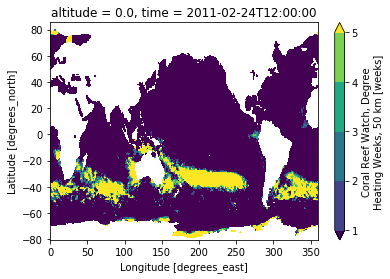

In [46]:
# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
levels = np.arange(1, 5 + 1)

plt.plot
crw.RWdhws.sel(time=mhws.date_peak[ev], method='nearest').plot(levels=levels)

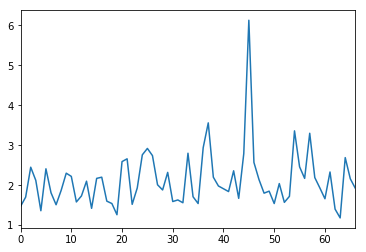

In [42]:
# mhws.intensity_max.plot()

### Print out the first few lines of each file:

In [5]:
clim.head() # To show all the data: remove ".head()".

,lon,lat,doy,seas,thresh
0,112.875,-28.875,1,22.04,23.38
1,112.875,-28.875,2,22.07,23.41
2,112.875,-28.875,3,22.10,23.44
3,112.875,-28.875,4,22.12,23.47
4,112.875,-28.875,5,22.15,23.50


In [6]:
mhws.head()

,lon,lat,event_no,duration,date_start,date_peak,date_end,intensity_mean,intensity_max,intensity_cumulative
0,112.875,-28.875,1,6,1982-08-07,1982-08-10,1982-08-12,1.327,1.47,7.96
1,112.875,-28.875,2,5,1983-01-16,1983-01-18,1983-01-20,1.608,1.70,8.04
2,112.875,-28.875,3,11,1983-06-06,1983-06-12,1983-06-16,1.971,2.45,21.68
3,112.875,-28.875,4,15,1984-06-28,1984-07-02,1984-07-12,1.830,2.12,27.45
4,112.875,-28.875,5,5,1984-07-28,1984-07-31,1984-08-01,1.288,1.36,6.44
